## Student Performance Indicator

#### Life Cycle of Machine Learning Project

- Understanding the problem statement
- Data collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

#### 1) Problem Statement

- This project understands how the Student's performance(test scores) is affected by other variables, such as gender, ethnicity, parental level of education, lunch and test preparatoin course.

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 columns 1000 rows

### 2.1) Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
#Numerical computing and working with arrays and mathematical computing
import numpy as np

#Data manupulation and analysis
import pandas as pd

#data visualization libraries, create grph charts and plots
import seaborn as sns
import matplotlib.pyplot as plt
#Display plots inside same window
%matplotlib inline

#To control and manage warnings generated during program execution
import warnings
# To suppress warnings for display important messages
warnings.filterwarnings('ignore')

#### Import the CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the Dataset

In [4]:
df.shape

(1000, 8)

#### 2.2 Dataset Information

- Gender
- Race/Ethnicity
- Parental Level of Education
- Lunch
- test preparation course
- math score
- reading score
- writing score


### 3. Data Checks to Perform

- Check Missing Values
- Check Duplicates
- Check Data Type
- Check the number of Unique Values of Each Column
- Check Statistics of Dataset
- Check Various categories present in Different Categories of Columns


#### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no any missing values in columns

#### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

##### There are no duplicate values in dataset

##### Remove Duplicates

In [7]:
df.drop_duplicates()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### 3.3 Check Data Types

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


#### 3.4 Check Number of Unique Values of Each Columns

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check Statistics of Dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight

- From above description of numerical data, all means are very close to each other : between 66 and 68.05
- All standard deviations are close to each other: between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading minimum is higher = 17

#### 3.7 Exploring Data

In [11]:
print("Categories in 'Gender' variable: ", end=" ")
print(df['gender'].unique())

Categories in 'Gender' variable:  <StringArray>
['female', 'male']
Length: 2, dtype: str


In [12]:
print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

Categories in 'race_ethnicity' variable:  <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str


In [13]:
print("Categories in 'Parental level of education' variable: ", end="")
print(df['parental_level_of_education'].unique())

Categories in 'Parental level of education' variable: <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str


In [14]:
print("Categories in 'lunch' variable: ", end=" " )
print(df['lunch'].unique())

Categories in 'lunch' variable:  <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str


In [15]:
print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'test_preparation_course' variable:  <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [16]:
print("Categories in 'math_score' variable: ", end="")
print(df['math_score'].unique())

Categories in 'math_score' variable: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]


In [17]:
print("Categories in 'reading_score' variable: ", end="")
print(df['reading_score'].unique())

Categories in 'reading_score' variable: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]


In [18]:
print("Categories in 'writing_score' variable: ", end="")
print(df['writing_score'].unique())

Categories in 'writing_score' variable: [ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  48  42  87  49  10  34  71  37  56  41  22  81  45  36  89  47  90 100
  64  98  51  40  84  69  33  60  85  91  77  27  94  95  19  35  32  96
  97  99  15  30  23]


##### Define Numerical and Categorical Columns

In [19]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'str' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'str']  

print("we have {} numerical features: {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### 3.8 Adding Columns for "Total Score" and "Average"

##### Here we apply feature engineering

In [21]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#####  Generating Student Count with Full Marks

In [22]:
reading_full = df[df['reading_score'] == 100]['average'].count()
print(f'Number of students with full marks for reading: {reading_full}')

Number of students with full marks for reading: 17


In [23]:
writing_full = df[df['writing_score'] == 100]['average'].count()
print(f'Number of students with full marks for writing: {writing_full} ')

Number of students with full marks for writing: 14 


In [24]:
math_full = df[df['math_score'] == 100]['average'].count()
print(f'Number of students with full marks for maths: {math_full}')

Number of students with full marks for maths: 7


##### Generating Student Count under the Condition

In [25]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
print(f'No of students with less than 20 marks for reading: {reading_less_20}')

No of students with less than 20 marks for reading: 1


In [26]:
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
print(f'No of students with marks less than 20 in writing: {writing_less_20}')

No of students with marks less than 20 in writing: 3


In [27]:
math_score_less_20 = df[df['math_score'] <= 20]['average'].count()
print(f'No of students with marks less than 20 for maths: {math_score_less_20}')

No of students with marks less than 20 for maths: 4


##### Insights

- From above values we get students have performed worst in maths
- Best performance is in reading section 

#### 4. Exploring Data(Visualization)

#### 4.1 Visualize average score distribution to make some conclusion

- Histogram
- Kernal Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

##### Histogram based on average

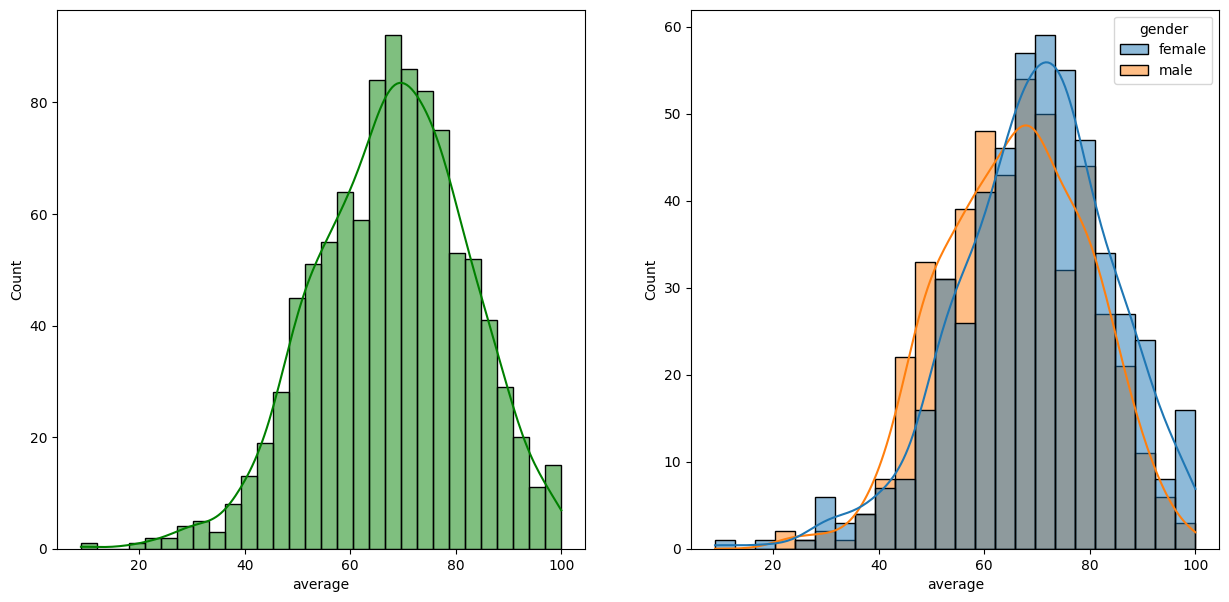

In [28]:
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True, hue='gender')
plt.show()

##### Female students tend to perform male students

#### Histogram based on Total Score

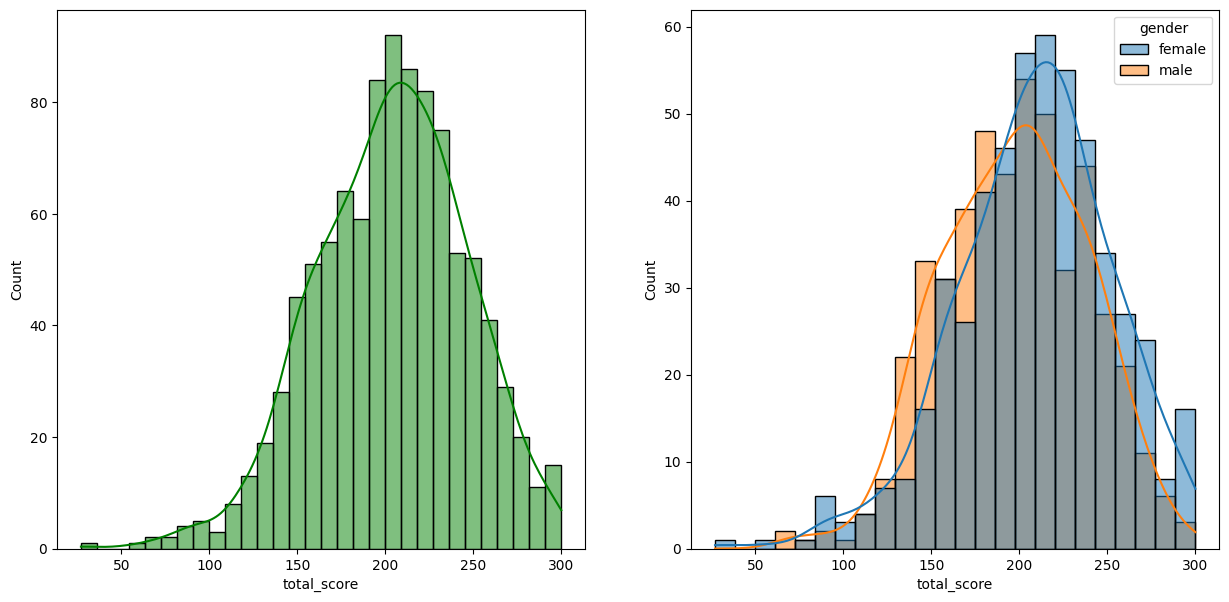

In [29]:
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

##### Insights

##### Female students tend to perform well than male students

##### Histogram based on average and lunch

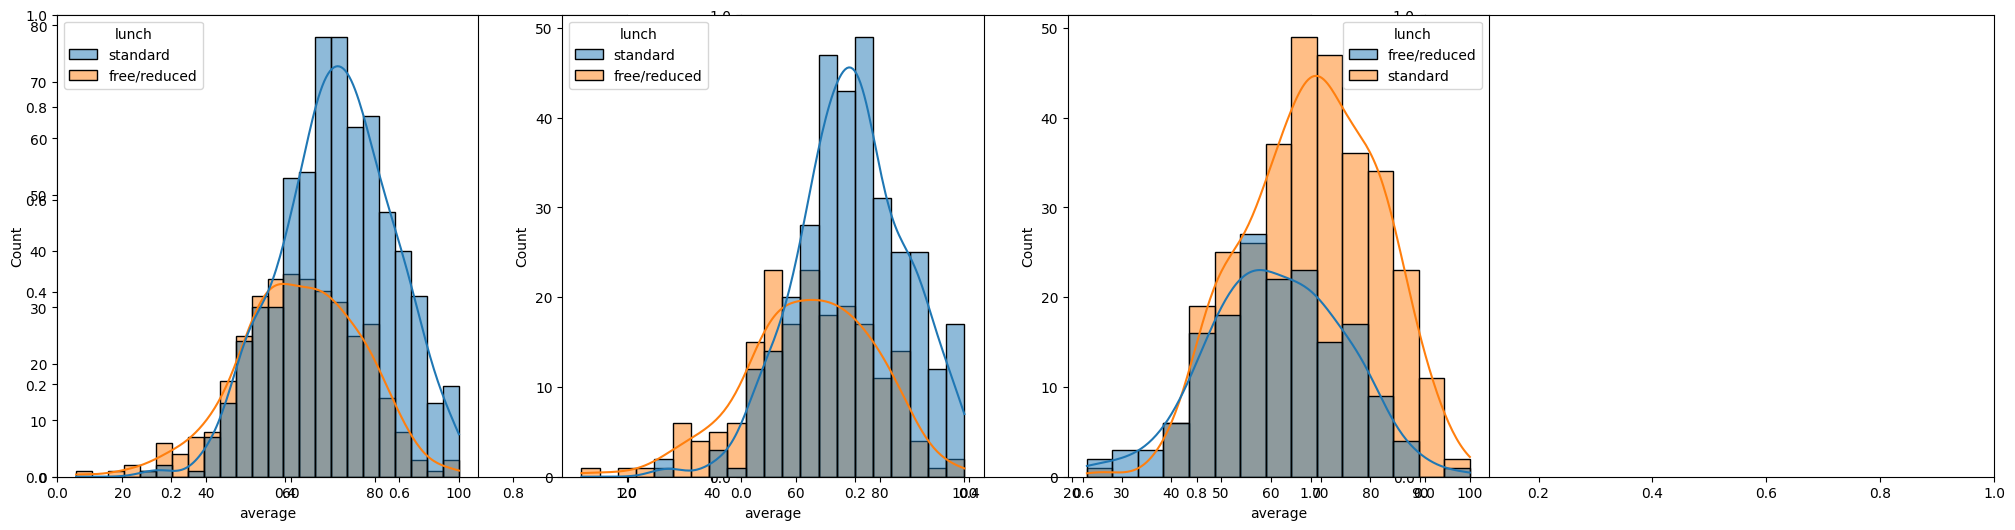

In [30]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

##### Insights

- Standard lunch helps perform well in exams
- standard lunch helps perform well in exams be it a male or female


##### Histogram based on Average and Parental Level of Education

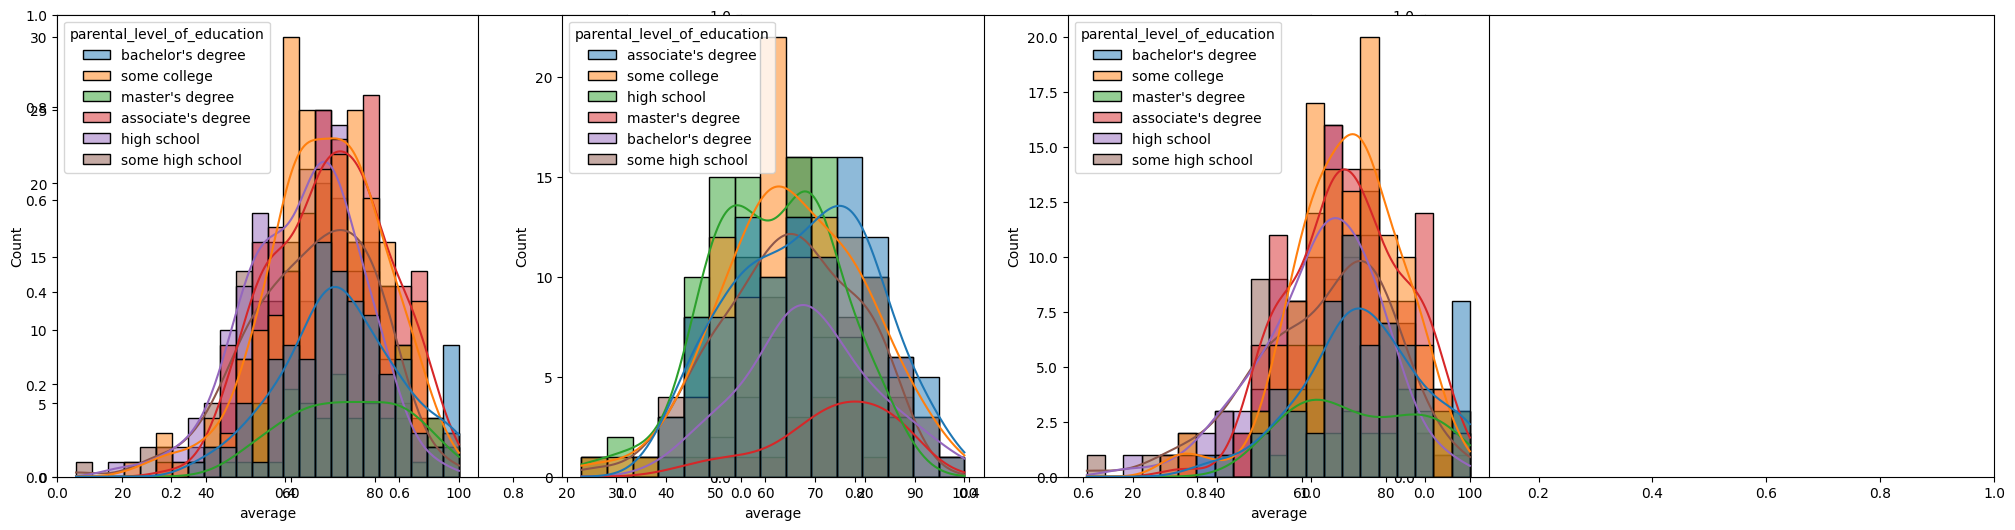

In [31]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',kde=True, hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

##### Insights

- In general parent's education don't help student perform well in exams
- 2nd plot shows that parent's whose education is of associate's degree or master's degree, their male child performs well in exams
- 3rd plot we can see there is no effect of parent's education on female students


##### Histogram based on Average and Race/Ethnicity

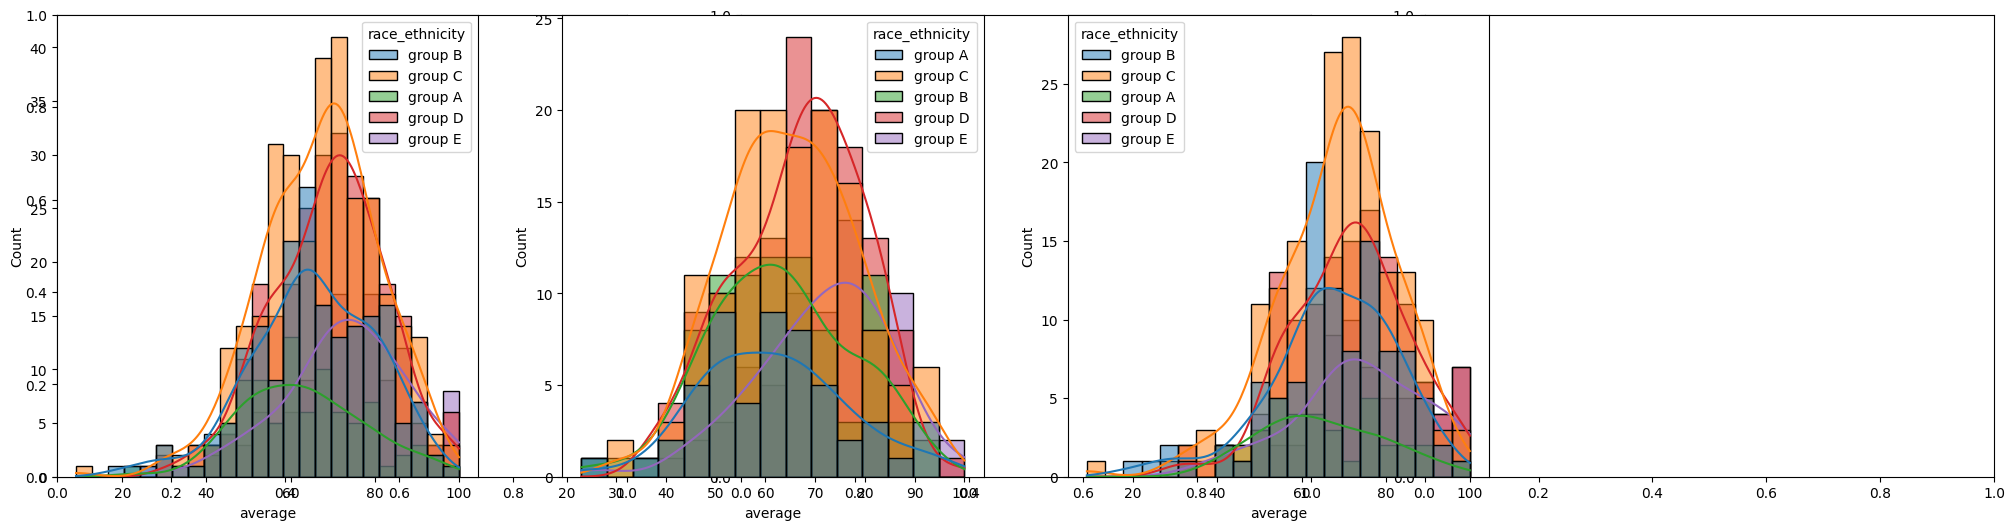

In [32]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'], x='average',kde=True, hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.show()

##### Insights

- Students of group A and group B tend to perform poorly in exams
- Students of group A and group B tend to perform poorly in exams irrespective of whether they are male or female

#### 4.2 Maximum Score of Students in All Three Subjects

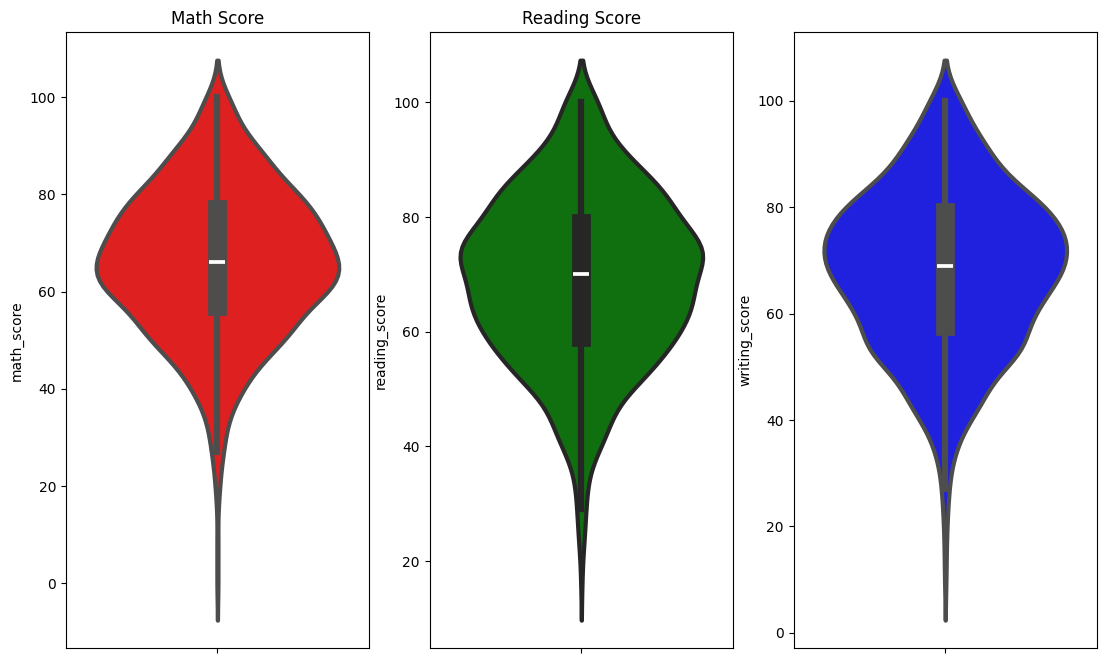

In [33]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math_score',data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading_score', data=df, color='green',linewidth=3)
plt.subplot(1,4,3)
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

##### Insights

From the above three plots its clearly visible that most of the student score in between 60-80 in maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

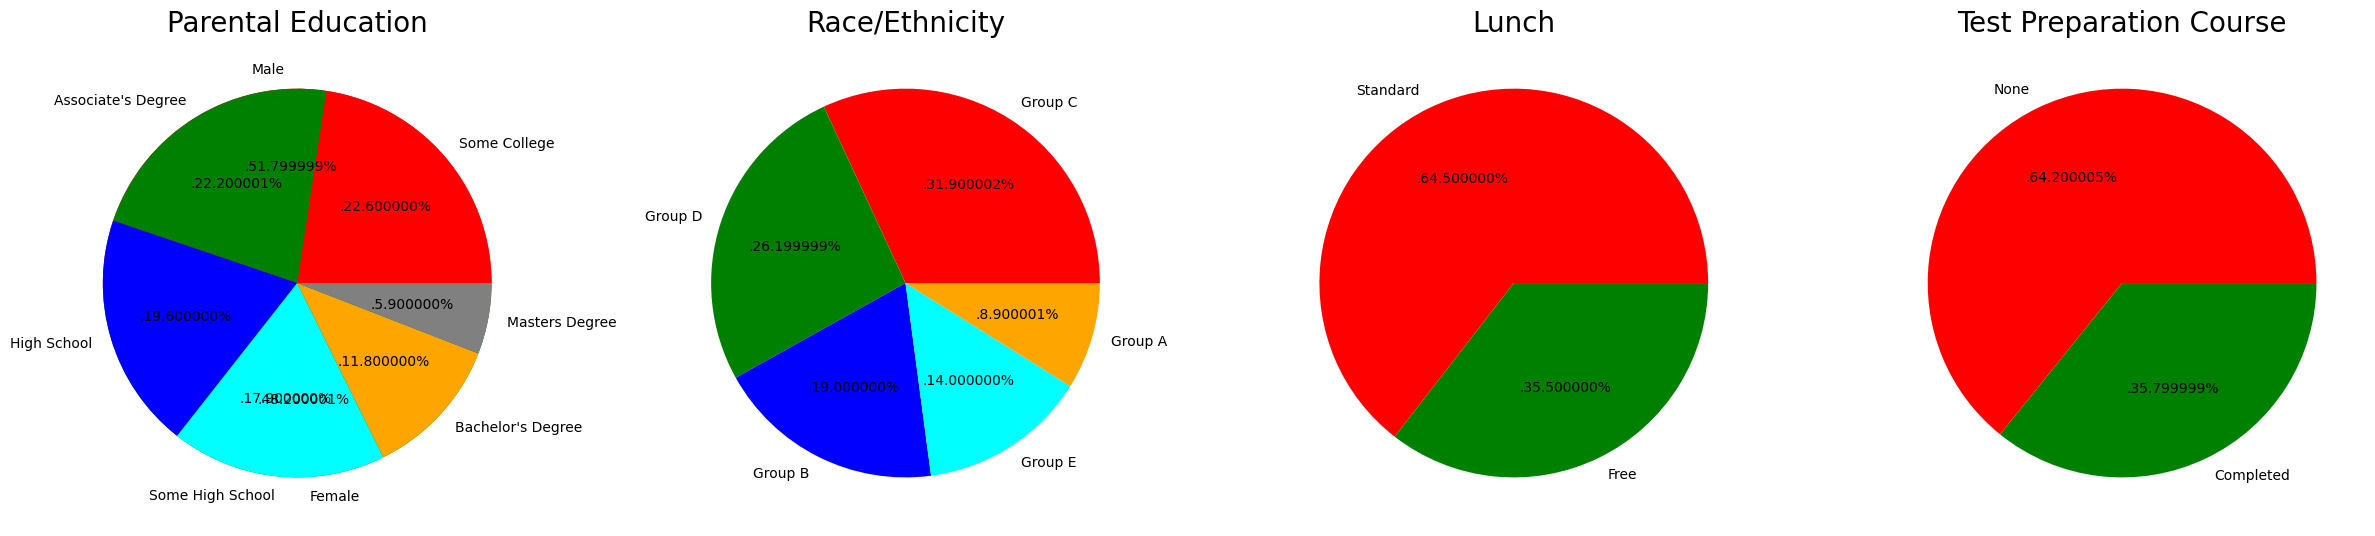

In [34]:
plt.rcParams['figure.figsize'] = (30,20)

#Pie Plot for Gender
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Male','Female'
color=['red','green']

plt.pie(size,colors=color, labels=labels,autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis='off'

#Pie Plot for Race/Ethnicity
plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color, labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis='off'

#Pie Plot for Lunch
plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']

plt.pie(size,colors=color, labels=labels,autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis='off'

#Pie Plot for Test Preparation Course
plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size,colors=color, labels=labels,autopct='.%2f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis='off'

#Pie Plot for Parent's Education
plt.subplot(1,5,1)
size=df['parental_level_of_education'].value_counts()
labels='Some College',"Associate's Degree",'High School','Some High School',"Bachelor's Degree",'Masters Degree'
color=['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color, labels=labels,autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis='off'

plt.tight_layout()
plt.grid()

plt.show()

##### Insights

- No of male and female students are almost equal
- No of students are greatest in Group C
- No of students who have standard lunch are greater
- No of students who have not enrolled in any test preparation course is greater
- No of students whoose parental education is 'some college' is greater followed closely by associate degree

#### 4.4 Feature Wise Visualization

##### 4.4.1 Gender Column

- How is distribution of gender?
- Is gender has any impact on student's performance?


##### UNIVARIATE ANALYSIS (How is distribution of gender?)

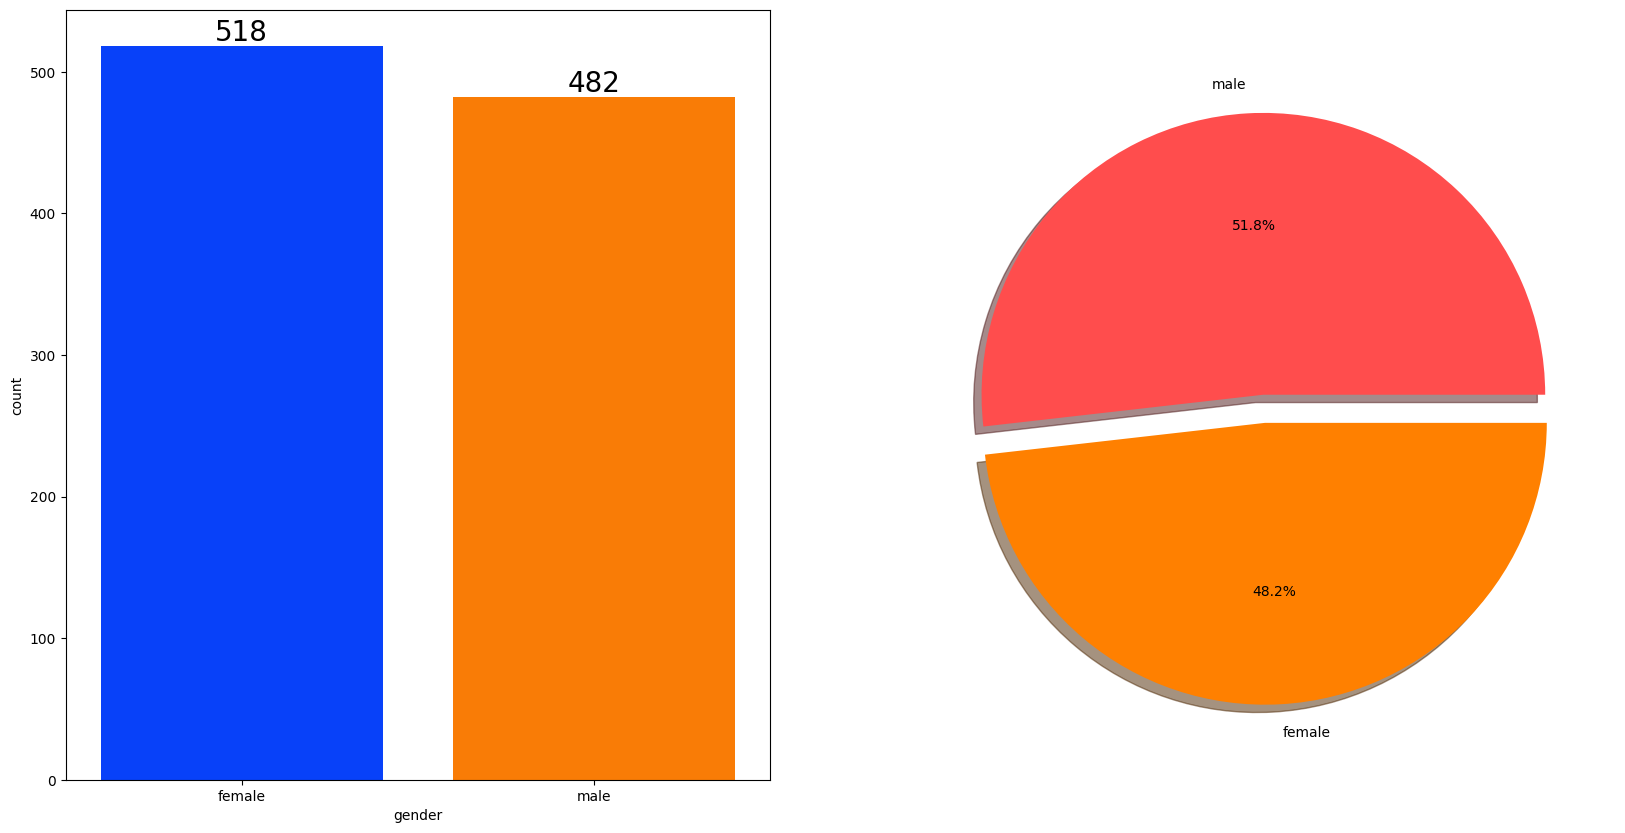

In [35]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['male','female'], explode=[0,0.1], autopct= '%1.1f%%', shadow=True, colors= ['#ff4d4d','#ff8000']  )

plt.show()

##### Insights

- Gender has balanced data with female students are 518(48%) and male students are 482(52%)

##### BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)

In [36]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [42]:
plt.figure(figsize=(10,8))

x=['Total Average','Math Average']
female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

x_axis = np.arrange(len(x))
plt.bar(x_axis-0.2, male_scores, 0.4, label='Male')
plt.bar(x_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.x_ticks(x_axis,x)
plt.ylabel("Marks")
plt.title("Total average vs math average marks of the both the genders", fontweight='bold')
plt.legend()

plt.show()



KeyError: 0

<Figure size 1000x800 with 0 Axes>